In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
d_frame=pd.read_csv(r'D:\Code\Nilm\3_EDA\Data\CSV\npcl.grid_log.csv')

In [21]:
# d_frame.columns

In [5]:
df=d_frame[['data.creation_time','data.grid_reading_kwh','data.grid_kwh_unit','data.status','data.error_reason',
'data.R_voltage','data.Y_volatge', 'data.B_voltage', 'data.r_current','data.y_current','data.b_current',
'data.cumm_pf','data.instant_cum_Kw',
'data.meter_sr_no','data.frequency','location_id','site_id']]

In [22]:
df.head(3)

,data.grid_reading_kwh,data.grid_kwh_unit,data.status,data.error_reason,data.R_voltage,data.Y_volatge,data.B_voltage,data.r_current,data.y_current,data.b_current,data.cumm_pf,data.instant_cum_Kw,data.meter_sr_no,data.frequency,location_id,site_id
data.creation_time,,,,,,,,,,,,,,,,
2021-05-01 00:01:57,460.0,0.0,P,No Consumption,235.8,240.8,226.6,0.52,7.30,7.31,0.99,3.47,DAL0000997,50.3,500000010032,6075bb51153a20.38235471
2021-05-01 00:04:01,460.0,0.0,P,No Consumption,235.8,240.8,226.6,0.52,7.30,7.31,0.99,3.47,DAL0000997,50.3,500000010032,6075bb51153a20.38235471
2021-05-01 00:06:06,460.0,0.0,P,No Consumption,234.4,238.4,228.9,7.79,7.29,1.11,0.99,3.77,DAL0000997,50.1,500000010032,6075bb51153a20.38235471


In [7]:
df['data.creation_time']=pd.DatetimeIndex(df['data.creation_time'])
df.set_index(['data.creation_time'],drop=True,inplace=True)

In [8]:
df=df[df['data.status']=='P']

In [ ]:
df = df[~((df['data.grid_kwh_unit'] != 0) & (df['data.error_reason'] == 'No Consumption'))]

In [23]:
df['data.status'].unique()

array(['P'], dtype=object)

In [24]:
df['data.cumm_pf'].unique()

array([0.99, 1.  , 0.98, 0.97, 0.95, 0.96, 0.94, 0.89, 0.85, 0.88, 0.9 ,
       0.84, 0.91, 0.8 , 0.93, 0.92, 0.78, 0.86, 0.72, 0.87, 0.83, 0.79,
       0.82, 0.71, 0.81, 0.76, 0.7 , 0.68, 0.62, 0.69, 0.58, 0.63, 0.67,
       0.5 , 0.77, 0.49, 0.75, 0.74, 0.73, 0.37, 0.64, 0.66, 0.65, 0.55,
       0.59, 0.42, 0.57, 0.6 , 0.56, 0.54, 0.52, 0.51, 0.39, 0.33, 0.46,
       0.47, 0.45, 0.61, 0.43, 0.53, 0.36, 0.48, 0.44, 0.4 ])

In [25]:
df['data.frequency'].unique()

array([50.3, 50.1, 50. , 50.2, 49.9, 49.8, 50.4, 49.7, 49.6, 50.5, 48.8,
       48.9, 49.5, 48.4, 49.2, 48.3, 48.2, 49.4, 49. , 50.6])

<Axes: xlabel='data.creation_time'>

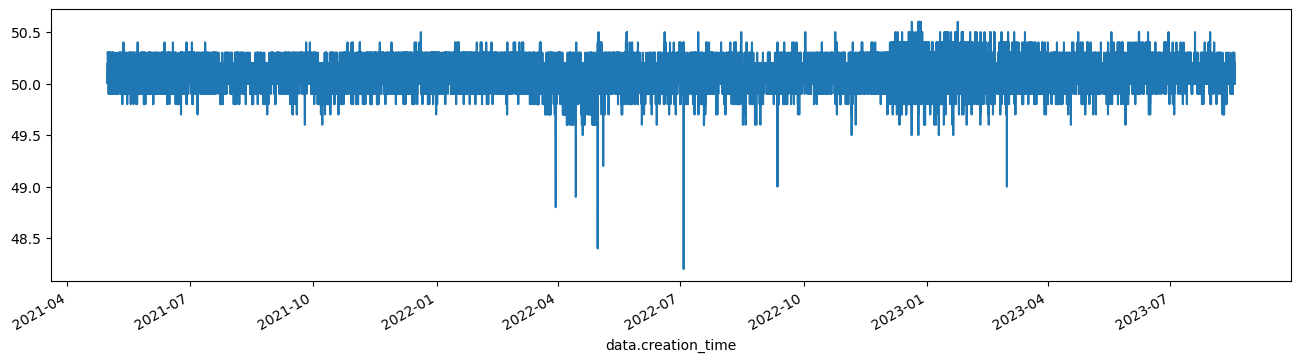

In [34]:
df['data.frequency'].plot(figsize=(16,4))

In [29]:
# df['2022-06-22 16:06:07':'2022-07-06 19:51:15'][0:50]
df['2021-05-24 16:00:00':'2021-05-25 12:00:00'][0:50]

,data.grid_reading_kwh,data.grid_kwh_unit,data.status,data.error_reason,data.R_voltage,data.Y_volatge,data.B_voltage,data.r_current,data.y_current,data.b_current,data.cumm_pf,data.instant_cum_Kw,data.meter_sr_no,data.frequency,location_id,site_id
data.creation_time,,,,,,,,,,,,,,,,
2021-05-24 16:03:10,1538.0,0.0,P,No Consumption,249.4,249.2,244.9,0.57,0.64,7.33,0.98,1.98,DAL0000997,50.2,500000010032,6075bb51153a20.38235471
2021-05-24 16:06:24,1538.0,0.0,P,No Consumption,249.8,248.5,244.8,0.57,0.69,1.22,0.99,0.53,DAL0000997,50.1,500000010032,6075bb51153a20.38235471
2021-05-24 16:09:41,1538.0,0.0,P,No Consumption,248.5,248.5,244.4,0.58,0.69,7.45,0.99,2.04,DAL0000997,50.2,500000010032,6075bb51153a20.38235471
2021-05-24 16:13:01,1538.0,0.0,P,No Consumption,248.5,247.2,243.4,0.69,0.69,0.95,0.99,0.50,DAL0000997,50.1,500000010032,6075bb51153a20.38235471
2021-05-24 16:16:18,1538.0,0.0,P,No Consumption,247.9,245.6,242.4,0.69,0.69,6.72,0.99,1.88,DAL0000997,50.0,500000010032,6075bb51153a20.38235471
2021-05-24 16:19:32,1538.0,0.0,P,No Consumption,247.4,246.3,242.9,0.63,0.69,0.95,0.99,0.48,DAL0000997,50.0,500000010032,6075bb51153a20.38235471
2021-05-24 16:22:45,1538.0,0.0,P,No Consumption,247.4,246.3,242.9,0.63,0.69,0.95,0.99,0.48,DAL0000997,50.0,500000010032,6075bb51153a20.38235471
2021-05-24 16:25:59,1538.0,0.0,P,No Consumption,246.6,246.2,242.4,0.66,0.69,6.64,0.99,1.85,DAL0000997,50.0,500000010032,6075bb51153a20.38235471
2021-05-24 16:31:32,1538.0,0.0,P,No Consumption,244.5,244.2,241.5,0.61,0.44,5.15,0.98,1.24,DAL0000997,50.0,500000010032,6075bb51153a20.38235471


In [15]:
# df=df[~(df(df['data.grid_kwh_unit']!=0) & (df['data.error_reason']=='No Consumption'))]
df = df[~((df['data.grid_kwh_unit'] != 0) & (df['data.error_reason'] == 'No Consumption'))]
# df[(df['data.grid_kwh_unit'] != 0) & (df['data.error_reason'] == 'No Consumption')]
